In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/전처리_train.csv")
test = pd.read_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/electric_test.csv")

#### 파생변수 추가

In [3]:
test.head()

,NUM,TM,HH24,STN,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elect
0,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1.0,NaN
1,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1.0,NaN
2,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1.0,NaN
3,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1.0,NaN
4,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1.0,NaN


In [4]:
test.columns

Index(['NUM', 'TM', 'HH24', 'STN', 'nph_ta', 'nph_hm', 'nph_ws_10m',
       'nph_rn_60m', 'nph_ta_chi', 'weekday', 'week_name', 'elect'],
      dtype='object')

In [5]:
test.rename(columns={'NUM': '격자넘버'}, inplace=True)
test.rename(columns={'TM': '날짜'}, inplace=True)
test.rename(columns={'HH24': '시간'}, inplace=True)
test.rename(columns={'STN': '지점번호'}, inplace=True)
test.rename(columns={'nph_ta': '기온'}, inplace=True)
test.rename(columns={'nph_hm': '상대습도'}, inplace=True)
test.rename(columns={'nph_ws_10m': '풍속'}, inplace=True)
test.rename(columns={'nph_rn_60m': '강수량'}, inplace=True)
test.rename(columns={'nph_ta_chi': '체감온도'}, inplace=True)
test.rename(columns={'weekday': '요일'}, inplace=True)
test.rename(columns={'week_name': '주중주말'}, inplace=True)

In [6]:
test.head()

,격자넘버,날짜,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,elect
0,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1.0,NaN
1,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1.0,NaN
2,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1.0,NaN
3,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1.0,NaN
4,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1.0,NaN


In [7]:
train.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace=True)

In [8]:
train.head()

,격자넘버,날짜,시간,공동주택수,지점번호,계약전력합계,전력수요합계,전력부하량평균,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,전력기상지수,계절,년,월,일
0,16914,2020-01-01 01:00:00,1,10,127,15550,2421.96,231.707030,-0.2,35.6,4.5,0.0,-8.5,2,0,104.53,겨울,2020,1,1
1,14240,2020-01-01 01:00:00,1,12,279,19500,3067.80,258.394386,-1.2,51.7,2.0,0.0,-8.4,2,0,98.94,겨울,2020,1,1
2,14235,2020-01-01 01:00:00,1,18,822,19674,3204.88,173.613430,-2.3,47.6,1.1,0.0,-7.4,2,0,102.55,겨울,2020,1,1
3,17495,2020-01-01 01:00:00,1,55,550,135200,19203.08,345.036894,-3.9,31.9,0.9,0.0,-6.7,2,0,101.19,겨울,2020,1,1
4,11125,2020-01-01 01:00:00,1,61,937,149300,17194.72,300.747194,2.9,66.3,1.7,0.0,-4.8,2,0,93.73,겨울,2020,1,1


In [ ]:
train['전력기상지수']

0          104.53
1           98.94
2          102.55
3          101.19
4           93.73
            ...  
7593176    106.65
7593177    110.07
7593178    109.66
7593179    105.21
7593180    115.12
Name: 전력기상지수, Length: 7593181, dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593181 entries, 0 to 7593180
Data columns (total 20 columns):
 #   Column   Dtype  
---  ------   -----  
 0   격자넘버     int64  
 1   날짜       object 
 2   시간       int64  
 3   공동주택수    int64  
 4   지점번호     int64  
 5   계약전력합계   int64  
 6   전력수요합계   float64
 7   전력부하량평균  float64
 8   기온       float64
 9   상대습도     float64
 10  풍속       float64
 11  강수량      float64
 12  체감온도     float64
 13  요일       int64  
 14  주중주말     int64  
 15  전력기상지수   float64
 16  계절       object 
 17  년        int64  
 18  월        int64  
 19  일        int64  
dtypes: float64(8), int64(10), object(2)
memory usage: 1.1+ GB


### CDH, HDH 생성

In [ ]:
# CDH, HDH 생성

# 기준 온도 설정 (일반적으로 18°C)
base_temp = 18.0

# CDH와 HDH 계산 함수
def calculate_cdh(temp, base_temp):
    return max(0, temp - base_temp)

def calculate_hdh(temp, base_temp):
    return max(0, base_temp - temp)

# apply 함수를 사용하여 CDH와 HDH 칼럼 생성
train['CDH'] = train.apply(lambda x: calculate_cdh(x['기온'], base_temp), axis=1)
train['HDH'] = train.apply(lambda x: calculate_hdh(x['기온'], base_temp), axis=1)

# test 셋
test['CDH'] = test.apply(lambda x: calculate_cdh(x['기온'], base_temp), axis=1)
test['HDH'] = test.apply(lambda x: calculate_hdh(x['기온'], base_temp), axis=1)

### 불쾌지수 생성

In [ ]:
# 불쾌지수 컬럼 추가
def calculate_discomfort_index(temperature, humidity):
    return 1.8 * temperature - 0.55 * (1 - humidity / 100) * (1.8 * temperature - 26) + 32

# 불쾌지수 컬럼 추가
train['불쾌지수'] = train.apply(lambda x: calculate_discomfort_index(x['기온'], x['상대습도']), axis=1)

# test 셋
test['불쾌지수'] = test.apply(lambda x: calculate_discomfort_index(x['기온'], x['상대습도']), axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593181 entries, 0 to 7593180
Data columns (total 23 columns):
 #   Column   Dtype  
---  ------   -----  
 0   격자넘버     int64  
 1   날짜       object 
 2   시간       int64  
 3   공동주택수    int64  
 4   지점번호     int64  
 5   계약전력합계   int64  
 6   전력수요합계   float64
 7   전력부하량평균  float64
 8   기온       float64
 9   상대습도     float64
 10  풍속       float64
 11  강수량      float64
 12  체감온도     float64
 13  요일       int64  
 14  주중주말     int64  
 15  전력기상지수   float64
 16  계절       object 
 17  년        int64  
 18  월        int64  
 19  일        int64  
 20  CDH      float64
 21  HDH      float64
 22  불쾌지수     float64
dtypes: float64(11), int64(10), object(2)
memory usage: 1.3+ GB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838239 entries, 0 to 2838238
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   격자넘버    int64  
 1   날짜      object 
 2   시간      int64  
 3   지점번호    int64  
 4   기온      float64
 5   상대습도    float64
 6   풍속      float64
 7   강수량     float64
 8   체감온도    float64
 9   요일      int64  
 10  주중주말    float64
 11  elect   float64
 12  CDH     float64
 13  HDH     float64
 14  불쾌지수    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 324.8+ MB


### 계절별 평균값 구하기

In [ ]:
# 각 계절별로 평균값 구하기
# 기온평균, 상대습도 평균, 체감온도 평균, 풍속 평균, 강수량 평균

# 계절별 평균 계산
seasonal_averages = train.groupby('계절').agg({
    '기온': 'mean',
    '상대습도': 'mean',
    '체감온도': 'mean',
    '풍속': 'mean',
    '강수량': 'mean'
}).reset_index()

seasonal_averages

,계절,기온,상대습도,체감온도,풍속,강수량
0,가을,21.012949,78.736894,21.918608,1.838737,0.166191
1,겨울,5.715689,61.006934,2.178274,1.963734,0.034498
2,봄,8.763697,61.596926,7.279877,2.121927,0.074266
3,여름,20.823402,78.300654,23.471918,1.740889,0.186799


In [ ]:
# 원본 데이터 프레임에 계절별 평균을 매핑하여 새로운 열 추가
train = train.merge(seasonal_averages, on='계절', suffixes=('', '_계절별평균'))

In [ ]:
test

,격자넘버,날짜,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,elect,CDH,HDH,불쾌지수
0,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1.0,NaN,0.0,10.2,48.572530
1,2385,2023-01-01 02:00:00,2,303,7.9,60.6,7.6,0.0,4.0,6,1.0,NaN,0.0,10.1,48.772726
2,2385,2023-01-01 03:00:00,3,303,8.2,61.9,8.7,0.0,4.1,6,1.0,NaN,0.0,9.8,49.115342
3,2385,2023-01-01 04:00:00,4,303,8.4,60.9,9.2,0.0,4.3,6,1.0,NaN,0.0,9.6,49.459744
4,2385,2023-01-01 05:00:00,5,303,8.5,60.9,9.5,0.0,4.3,6,1.0,NaN,0.0,9.5,49.601035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838234,12322,2023-12-31 19:00:00,19,901,5.7,72.3,3.6,0.0,5.7,6,1.0,NaN,0.0,12.3,44.657989
2838235,12322,2023-12-31 20:00:00,20,901,5.6,70.8,3.2,0.0,5.8,6,1.0,NaN,0.0,12.4,44.636752
2838236,12322,2023-12-31 21:00:00,21,901,5.3,69.1,3.6,0.0,4.5,6,1.0,NaN,0.0,12.7,44.337377
2838237,12322,2023-12-31 22:00:00,22,901,5.1,70.6,3.0,0.0,5.1,6,1.0,NaN,0.0,12.9,43.899794


In [ ]:
test = test.sort_values(by='날짜')
test['날짜'] = pd.to_datetime(test['날짜'])

In [ ]:
def assign_season(date):
    if (date.month == 2) or (date.month == 3) or (date.month == 4):
        return '봄'
    elif (date.month == 5) or (date.month == 6) or (date.month == 7):
        return '여름'
    elif (date.month == 8) or (date.month == 9) or (date.month == 10):
        return '가을'
    else:
        return '겨울'

# '계절' 컬럼 생성
test['계절'] = test['날짜'].apply(assign_season)

In [ ]:
def assign_date(df, date_column):
    df['년'] = df[date_column].dt.year
    df['월'] = df[date_column].dt.month
    df['일'] = df[date_column].dt.day
    df['시간'] = df[date_column].dt.hour
    return df

test = assign_date(test, '날짜')
test.head(3)

,격자넘버,날짜,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,elect,CDH,HDH,불쾌지수,계절,년,월,일
0,2385,2023-01-01 01:00:00,1,303,7.8,61.5,6.7,0.0,4.2,6,1.0,NaN,0.0,10.2,48.57253,겨울,2023,1,1
849720,17940,2023-01-01 01:00:00,1,430,-2.0,61.1,0.6,0.0,-0.3,6,1.0,NaN,0.0,20.0,34.73292,겨울,2023,1,1
858480,18089,2023-01-01 01:00:00,1,366,-2.0,61.1,0.6,0.0,-0.3,6,1.0,NaN,0.0,20.0,34.73292,겨울,2023,1,1


In [ ]:
# test 셋
# 계절별 평균 계산
seasonal_averages = test.groupby('계절').agg({
    '기온': 'mean',
    '상대습도': 'mean',
    '체감온도': 'mean',
    '풍속': 'mean',
    '강수량': 'mean'
}).reset_index()

seasonal_averages

,계절,기온,상대습도,체감온도,풍속,강수량
0,가을,22.025777,78.372264,23.035785,1.556179,0.169197
1,겨울,5.739256,63.075568,2.251787,2.083801,0.072797
2,봄,9.465659,63.190962,8.185359,1.997568,0.057488
3,여름,21.209076,81.612165,24.040850,1.730960,0.292642


In [ ]:
test = test.merge(seasonal_averages, on='계절', suffixes=('', '_계절별평균'))

In [ ]:
train.columns

Index(['격자넘버', '날짜', '시간', '공동주택수', '지점번호', '계약전력합계', '전력수요합계', '전력부하량평균',
       '기온', '상대습도', '풍속', '강수량', '체감온도', '요일', '주중주말', '전력기상지수', '계절', '년',
       '월', '일', 'CDH', 'HDH', '불쾌지수', '기온_계절별평균', '상대습도_계절별평균', '체감온도_계절별평균',
       '풍속_계절별평균', '강수량_계절별평균'],
      dtype='object')

In [ ]:
test.columns

Index(['격자넘버', '날짜', '시간', '지점번호', '기온', '상대습도', '풍속', '강수량', '체감온도', '요일',
       '주중주말', 'elect', 'CDH', 'HDH', '불쾌지수', '계절', '년', '월', '일', '기온_계절별평균',
       '상대습도_계절별평균', '체감온도_계절별평균', '풍속_계절별평균', '강수량_계절별평균'],
      dtype='object')

In [3]:
test.to_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/파생변수_test.csv")
train.to_csv("C:/Users/삼성/OneDrive - 계명대학교/바탕 화면/날씨빅콘/날씨 데이터셋/파생변수_train.csv")

NameError: name 'test' is not defined

### 필요없는 열 제거

In [54]:
# 공동주택수, 계약전력합계, 전력수요합계, 전력부하량평균
train_drop = train.drop(columns = ['공동주택수','계약전력합계','전력수요합계', '전력부하량평균', 
                                   '체감온도_계절별평균','상대습도_계절별평균','날짜','년'])

In [55]:
test_drop = test.drop(columns = ['상대습도_계절별평균','체감온도_계절별평균','날짜','년'])

In [43]:
train_drop.columns

Index(['격자넘버', '날짜', '시간', '지점번호', '기온', '상대습도', '풍속', '강수량', '체감온도', '요일',
       '주중주말', '전력기상지수', '계절', '년', '월', '일', 'CDH', 'HDH', '불쾌지수', '기온_계절별평균',
       '풍속_계절별평균', '강수량_계절별평균'],
      dtype='object')

In [45]:
test_drop.columns

Index(['격자넘버', '날짜', '시간', '지점번호', '기온', '상대습도', '풍속', '강수량', '체감온도', '요일',
       '주중주말', 'elect', 'CDH', 'HDH', '불쾌지수', '계절', '년', '월', '일', '기온_계절별평균',
       '풍속_계절별평균', '강수량_계절별평균'],
      dtype='object')

### 다중공선성 확인

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
from matplotlib import font_manager as fm
# 나눔 글꼴을 지정하기 위해 matplotlib의 rc 설정을 사용
# 경로에 있는 글꼴을 지정합니다. 글꼴 파일의 경로를 올바르게 지정해야 합니다.
nanum_gothic_font_path = 'C:/WINDOWS/Fonts/NGULIM.TTF'
font_name = fm.FontProperties(fname=nanum_gothic_font_path).get_name()
plt.rc('font', family = font_name)

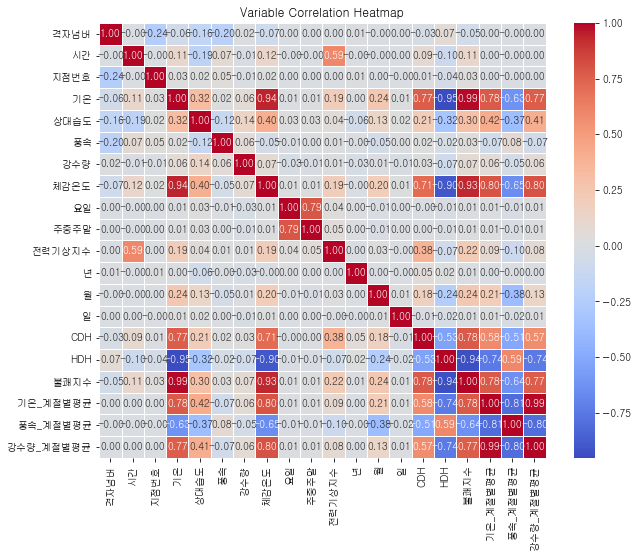

In [41]:
numeric_df = train_drop.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Variable Correlation Heatmap')
plt.show()

### 모델링

In [50]:
train_drop.head(5)

,격자넘버,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,...,계절,년,월,일,CDH,HDH,불쾌지수,기온_계절별평균,풍속_계절별평균,강수량_계절별평균
0,16914,1,127,-0.2,35.6,4.5,0.0,-8.5,2,0,...,겨울,2020,1,1,0.0,18.2,40.976712,5.715689,1.963734,0.034498
1,14240,1,279,-1.2,51.7,2.0,0.0,-8.4,2,0,...,겨울,2020,1,1,0.0,19.2,37.320704,5.715689,1.963734,0.034498
2,14235,1,822,-2.3,47.6,1.1,0.0,-7.4,2,0,...,겨울,2020,1,1,0.0,20.3,36.546348,5.715689,1.963734,0.034498
3,17495,1,550,-3.9,31.9,0.9,0.0,-6.7,2,0,...,겨울,2020,1,1,0.0,21.9,37.347641,5.715689,1.963734,0.034498
4,11125,1,937,2.9,66.3,1.7,0.0,-4.8,2,0,...,겨울,2020,1,1,0.0,15.1,41.071573,5.715689,1.963734,0.034498


In [56]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593181 entries, 0 to 7593180
Data columns (total 20 columns):
 #   Column     Dtype  
---  ------     -----  
 0   격자넘버       int64  
 1   시간         int64  
 2   지점번호       int64  
 3   기온         float64
 4   상대습도       float64
 5   풍속         float64
 6   강수량        float64
 7   체감온도       float64
 8   요일         int64  
 9   주중주말       int64  
 10  전력기상지수     float64
 11  계절         object 
 12  월          int64  
 13  일          int64  
 14  CDH        float64
 15  HDH        float64
 16  불쾌지수       float64
 17  기온_계절별평균   float64
 18  풍속_계절별평균   float64
 19  강수량_계절별평균  float64
dtypes: float64(12), int64(7), object(1)
memory usage: 1.1+ GB


In [51]:
test_drop.head(5)

,격자넘버,시간,지점번호,기온,상대습도,풍속,강수량,체감온도,요일,주중주말,...,CDH,HDH,불쾌지수,계절,년,월,일,기온_계절별평균,풍속_계절별평균,강수량_계절별평균
0,2385,1,303,7.8,61.5,6.7,0.0,4.2,6,1.0,...,0.0,10.2,48.572530,겨울,2023,1,1,5.739256,2.083801,0.072797
1,17940,1,430,-2.0,61.1,0.6,0.0,-0.3,6,1.0,...,0.0,20.0,34.732920,겨울,2023,1,1,5.739256,2.083801,0.072797
2,18089,1,366,-2.0,61.1,0.6,0.0,-0.3,6,1.0,...,0.0,20.0,34.732920,겨울,2023,1,1,5.739256,2.083801,0.072797
3,18238,1,434,-0.5,54.3,2.1,0.0,-1.9,6,1.0,...,0.0,18.5,37.861315,겨울,2023,1,1,5.739256,2.083801,0.072797
4,12618,1,152,6.7,61.7,4.2,0.0,-2.3,6,1.0,...,0.0,11.3,46.996461,겨울,2023,1,1,5.739256,2.083801,0.072797


### 모델링

### LGBM

In [67]:
pip install lightgbm


   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00


In [84]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [77]:
# 특징 변수와 타겟 변수 분리
X = train_drop.drop(['전력기상지수'], axis=1)  # 타겟 변수는 '기온'이라고 가정
y = train_drop['기온']

In [78]:
# 원핫 인코딩 및 스케일링
categorical_features = ['계절']
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# 파이프라인 생성
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', lgb.LGBMRegressor())])

In [81]:
# 모델 학습
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.594190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2373
[LightGBM] [Info] Number of data points in the train set: 6074544, number of used features: 22
[LightGBM] [Info] Start training from score 14.116100


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['격자넘버', '시간', '지점번호', '기온',
                                                   '상대습도', '풍속', '강수량', '체감온도',
                                                   '요일', '주중주말', '월', '일',
                                                   'CDH', 'HDH', '불쾌지수',
                                                   '기온_계절별평균', '풍속_계절별평균',
                                                   '강수량_계절별평균']),
                                                 ('cat', OneHotEncoder(),
                                                  ['계절'])])),
                ('regressor', LGBMRegressor())])

In [86]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__n_estimators': [50, 100, 200],
    'regressor__num_leaves': [20, 30, 40],
    'regressor__min_child_samples': [10, 20, 30],
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=20; total time=   6.3s
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=20; total time=   3.9s
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=20; total time=   2.4s
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=20; total time=   2.0s
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=20; total time=   2.2s
[CV] END regressor__learning_rate=0.01, regressor__min_child_samples=10, regressor__n_estimators=50, regressor__num_leaves=30; total time=   1.8s
[CV] END regressor__learning_rate=0.01, regressor__min_child_s

KeyboardInterrupt: 

In [87]:
# 모델 성능 평가
y_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f'테스트 세트 R^2: {test_r2}')

테스트 세트 R^2: 0.9999940989054765


In [88]:
y_pred = model.predict(test_drop)
print(y_pred)

[ 7.79962524 -2.00143095 -2.00143095 ...  2.59647332  3.2010569
 -1.28379749]
